In [110]:
import pandas as pd

In [111]:
df = pd.read_csv("heart.csv")

In [112]:
df = pd.DataFrame(df)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [113]:
df["Sex"] = df["Sex"].astype('category')
df["Sex"] = df["Sex"].cat.codes
df["ChestPainType"] = df["ChestPainType"].astype('category')
df["ChestPainType"] = df["ChestPainType"].cat.codes

df["RestingECG"] = df["RestingECG"].astype('category')
df["RestingECG"] = df["RestingECG"].cat.codes

df["ExerciseAngina"] = df["ExerciseAngina"].astype('category')
df["ExerciseAngina"] = df["ExerciseAngina"].cat.codes

df["ST_Slope"] = df["ST_Slope"].astype('category')
df["ST_Slope"] = df["ST_Slope"].cat.codes

In [114]:
import matplotlib.pyplot as plt


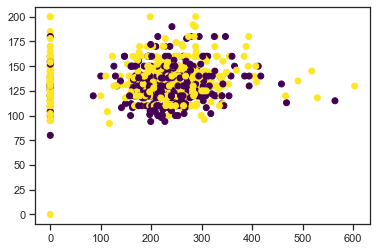

In [115]:
plt.scatter(df["Cholesterol"], df["RestingBP"],c=df["HeartDisease"],cmap='viridis')
plt.show()

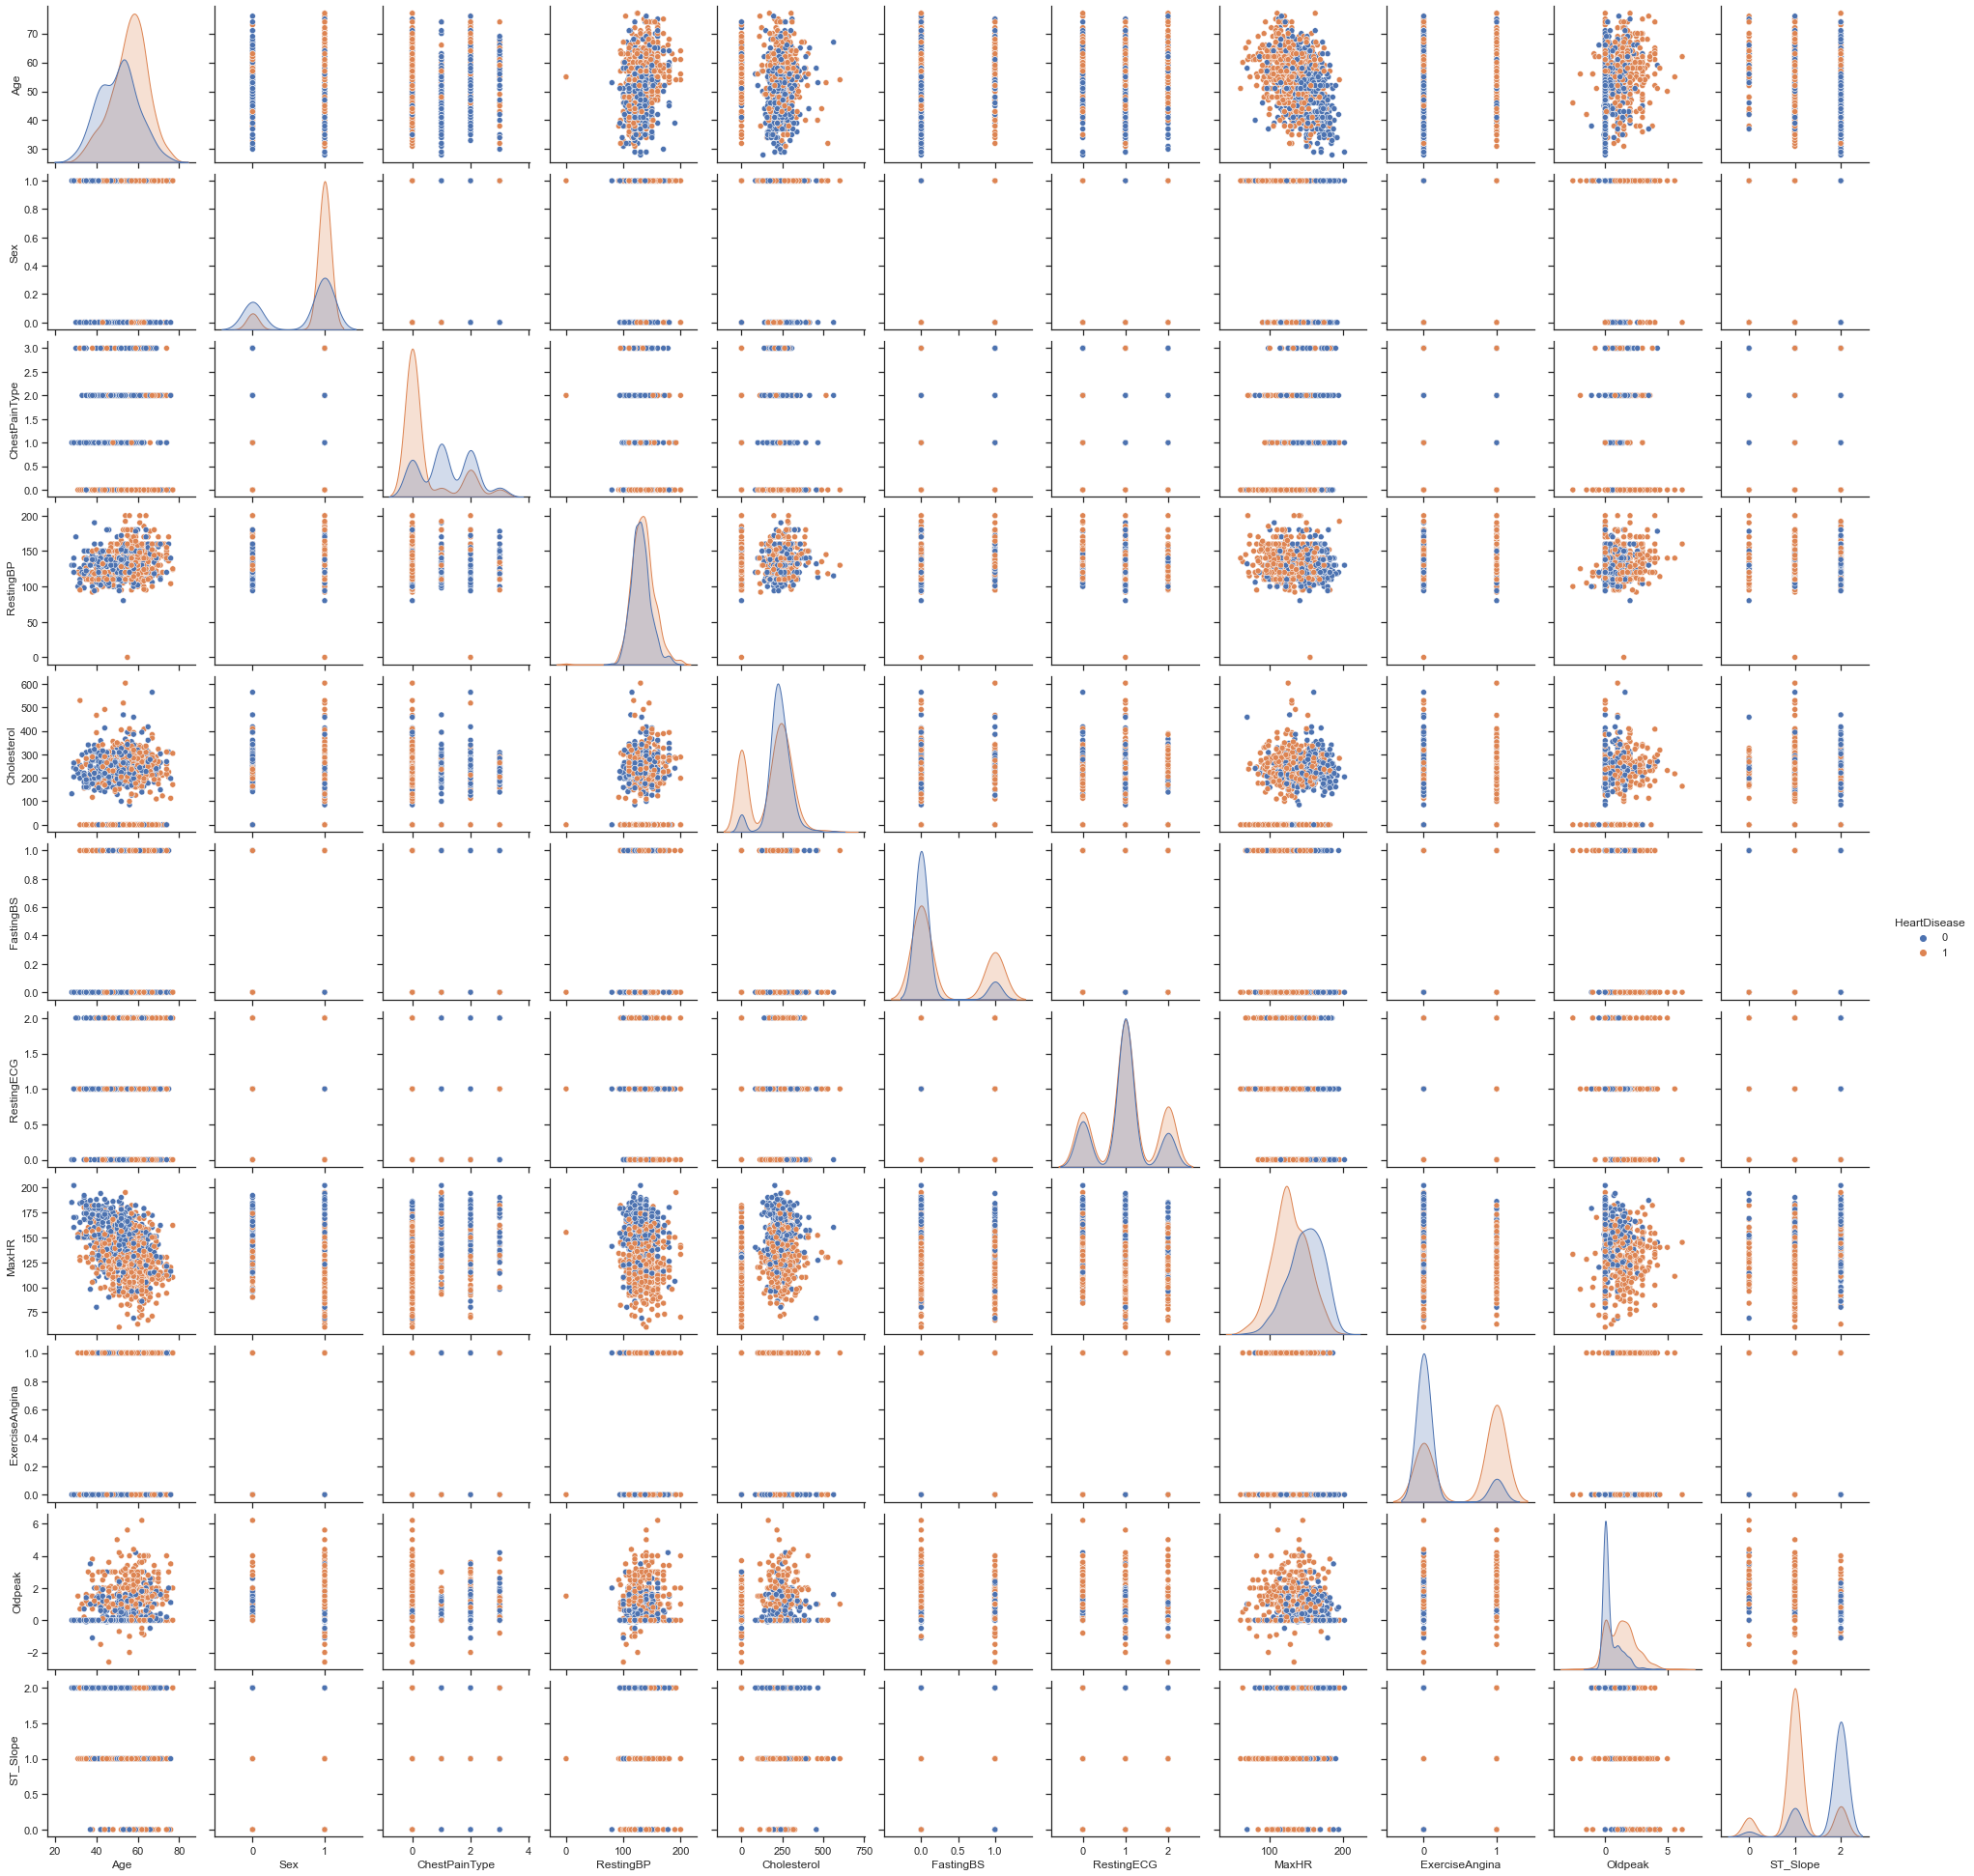

In [116]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df, hue="HeartDisease")

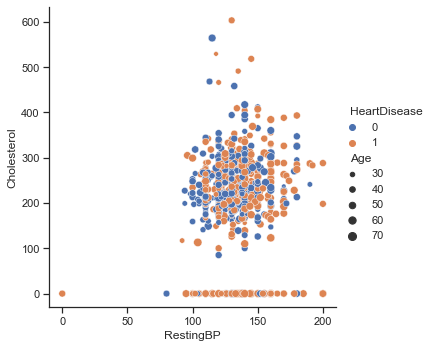

In [117]:
g = sns.relplot(
    data=df,
    x="RestingBP", y="Cholesterol",
    hue="HeartDisease", size="Age"
)


In [118]:
from sklearn.model_selection import train_test_split


In [119]:
x = df.drop("HeartDisease",1)

In [120]:
y = df["HeartDisease"]

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split( x,y, test_size=0.2, random_state=0)

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
clf = LogisticRegression()

In [124]:
clf.fit(X_train,Y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [125]:
clf.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [126]:
y_pred = clf.predict(X_test)

In [127]:
from sklearn.metrics import confusion_matrix

In [128]:
confusion_matrix(Y_test, y_pred)

array([[59, 18],
       [11, 96]], dtype=int64)

In [129]:
from sklearn.metrics import plot_confusion_matrix

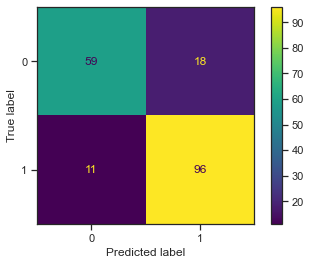

In [130]:
plot_confusion_matrix(clf, X_test, Y_test) 

In [131]:
 from sklearn.metrics import RocCurveDisplay
from sklearn import metrics


In [132]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred)

In [133]:
roc_auc = metrics.auc(fpr, tpr)

In [134]:
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')

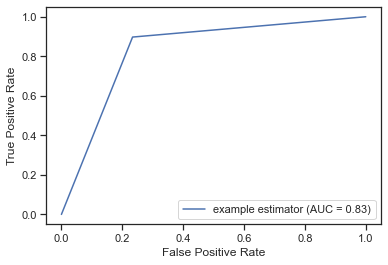

In [135]:
display.plot()

In [136]:
import shap

In [147]:
explainer = shap.LinearExplainer(clf,X_test[:5])

In [151]:
shap_values = explainer.shap_values(X_test[:5])


1.4971530234886155

In [149]:
shap.initjs()

In [170]:
shap.force_plot(explainer.expected_value, shap_values[1], X_test[:1])